### **the creator of this is not at all responsible for any trading decisions made by the following material lol **###

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 10.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=e7fde9ef9ae38dc8e51c2f68c21c76b8dab6b37f041d3d87132282303c805b83
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib



--2021-11-10 09:43:14--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-10 09:43:14--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-11-10 09:43:14--  http://newcontinuum.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving newco

In [ ]:
#https://www.tradingview.com/x/X9lZSs3w/
# check the above website, the most famous chartin websites do check it out for any indicators ;)

In [ ]:
import yfinance as yf
import pandas as pd 
import numpy as np

In [ ]:
df = yf.download('AAPL',period = '3mo', interval = '1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
?talib.RSI

In [ ]:
df['RSI_bytalib'] = talib.RSI(df['Adj Close'],timeperiod = 14)
## similar to the approach for BBANDS u can write this code

In [ ]:
n = 14 # Number of period
#the most popular period is the previous 14 candaels - feel free to chage depending on ur strategy or  risk capacity, etc.
change = df['Adj Close'].diff(1)
#basically diffnce from pervious value
#do .diff(-1)
df['change'] = change
df['change'][0] = 0
#df['Loss'][0] = 0
#df['Gain'][0] = 0
print(df['change'][0])

df['Gain'] = change.mask(change<0,0)
df['Loss'] = abs(change.mask(change>0,0))

#aabsoulte value to be tkaen
#know abt pandas.df.mask(...)

#u can also use df.dropna()

df['AVG_Gain'] = df.Gain.rolling(n).mean()
df['AVG_Loss'] = df.Loss.rolling(n).mean()
df['RS'] = df['AVG_Gain']/df['AVG_Loss']
df['RSI'] = 100 - (100/(1+df['RS']))
df
#basic math and stuff

0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Open,High,Low,Close,Adj Close,Volume,RSI_bytalib,change,Gain,Loss,AVG_Gain,AVG_Loss,RS,RSI
Date,,,,,,,,,,,,,,
2021-08-10,146.440002,147.710007,145.300003,145.600006,145.387817,69023100,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-11,146.050003,146.720001,145.529999,145.860001,145.647430,48493500,NaN,0.259613,0.259613,0.000000,NaN,NaN,NaN,NaN
2021-08-12,146.190002,149.050003,145.839996,148.889999,148.673019,72282600,NaN,3.025589,3.025589,0.000000,NaN,NaN,NaN,NaN
2021-08-13,148.970001,149.440002,148.270004,149.100006,148.882721,59318800,NaN,0.209702,0.209702,0.000000,NaN,NaN,NaN,NaN
2021-08-16,148.539993,151.190002,146.470001,151.119995,150.899765,103296000,NaN,2.017044,2.017044,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-03,150.389999,151.970001,149.820007,151.490005,151.269241,54511500,60.968828,1.467865,1.467865,0.000000,0.902254,0.350915,2.571147,71.997794
2021-11-04,151.580002,152.429993,150.639999,150.960007,150.740005,60394600,59.197977,-0.529236,0.000000,0.529236,0.825224,0.388718,2.122938,67.978876
2021-11-05,151.889999,152.199997,150.059998,151.279999,151.279999,65414600,60.459908,0.539993,0.539993,0.000000,0.741830,0.388718,1.908403,65.616872


###########################
# NOTE

IF U SEE THE INITIAL VALUES MATCH BUT AFTER A COUPLE VALUES, THE RSI_BYTALIB MATCHES THE ACTUAL RSI VALUE
BUT THE OTHER ONE DIVERGES

THIS CAN BE ACCOUNTERD FOR SLIGHT MATH ERRORS, EITHER WAYS U CAN USE RSI_BYTALIB FOR ANY USES 

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

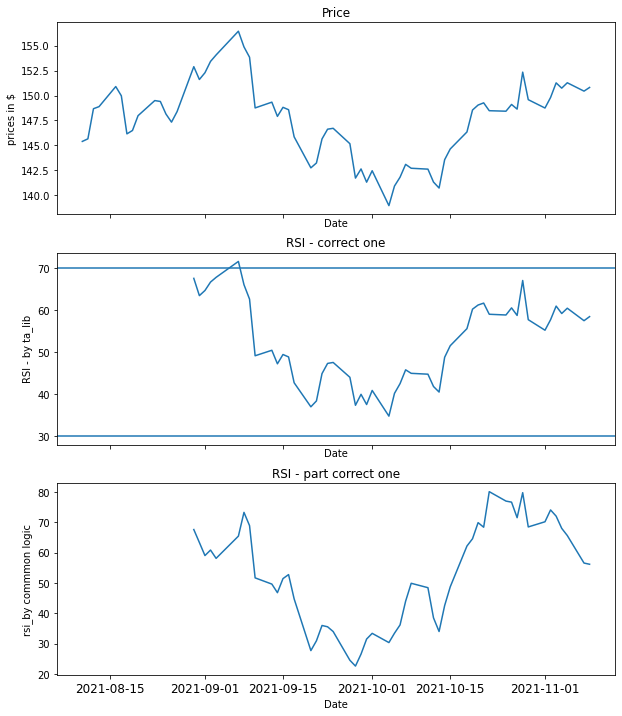

In [ ]:
#this is basically one of the ways to plot graphs one on top of the other
a1,a2 = plt.subplots(3,1,sharex = True,figsize = (10,12))
a2[0].plot(df['Adj Close'])
a2[0].set(title = 'Price', ylabel = 'prices in $',xlabel = 'Date')
a2[1].plot(df['RSI_bytalib'])
a2[1].axhline(y = 70)
a2[1].axhline(y = 30)
###
#even this level can be changed depending upon ur strategy
a2[1].set(title = 'RSI - correct one', ylabel = 'RSI - by ta_lib',xlabel = 'Date')
a2[2].plot(df['RSI'])
a2[2].set(title = 'RSI - part correct one', ylabel = 'rsi_by commmon logic',xlabel = 'Date')
a2[2].tick_params(axis = 'x',which = 'major', labelsize = 12)
